**American Put Option Pricing using Binomial Tree**

This notebook demonstrates American put option pricing using a recombining binomial tree. It implements backward induction under the risk-neutral measure, accounting for early exercise opportunities to determine the option value at each node. The notebook explores sensitivity to volatility, interest rate, and time to maturity, and calculates the early exercise boundary. This implementation highlights key numerical methods in quantitative finance, including discrete-time stochastic modeling, American-style option pricing, and practical risk management applications.

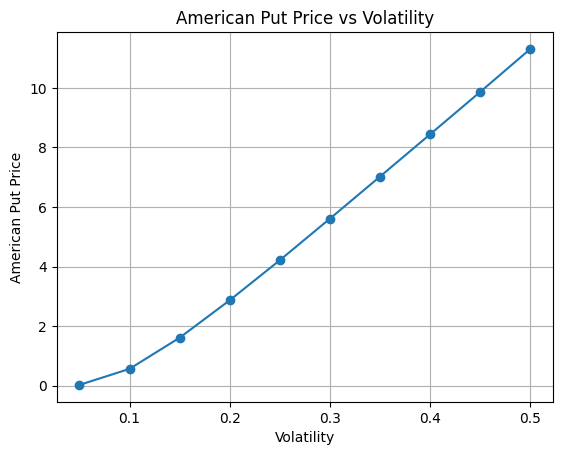

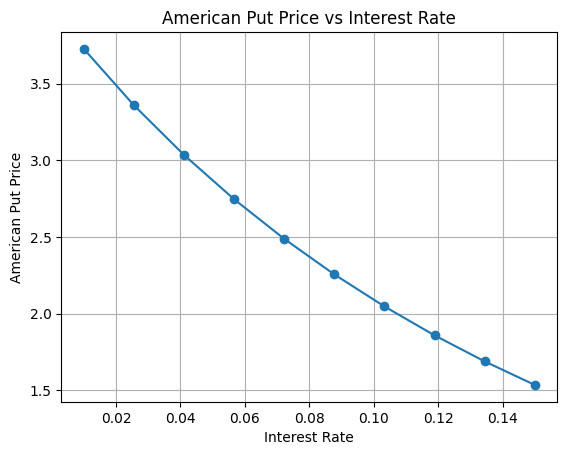

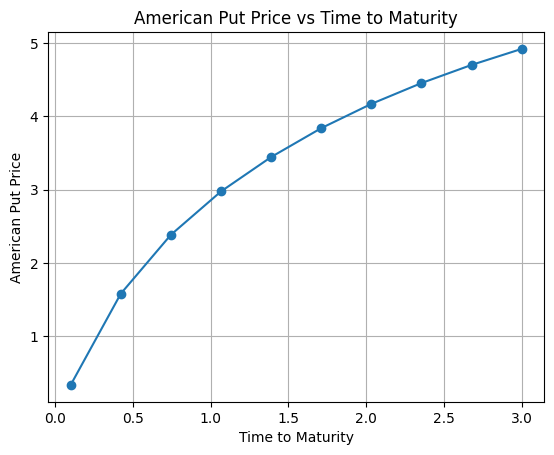

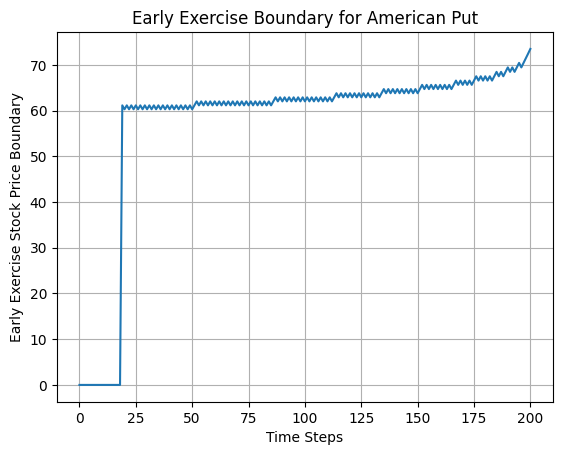

In [1]:
# -------------------------
# American Put Option Pricing using Binomial Tree
# -------------------------

import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. American Put Binomial Pricing Function
# -------------------------
def bin_price_amer_put(S0, K, r, T, sigma, steps):
    """
    Compute the American put option price using a recombining binomial tree.

    Parameters:
    S0 : float - initial stock price
    K : float - strike price
    r : float - risk-free rate
    T : float - time to maturity
    sigma : float - volatility
    steps : int - number of discrete time steps in the tree

    Returns:
    option_price : float - American put option price at t=0
    """
    t_i = T / steps                     # time increment per step
    u = np.exp(sigma * np.sqrt(t_i))    # up factor per step
    d = 1 / u                            # down factor per step
    p = (np.exp(r * t_i) - d) / (u - d) # risk-neutral probability

    # -------------------------
    # Build the stock price tree
    # -------------------------
    stock_price = np.zeros((steps+1, steps+1))
    for i in range(steps+1):
        for j in range(i+1):
            stock_price[j, i] = S0 * (u ** (i-j)) * (d ** j)

    # -------------------------
    # Initialize option payoff at maturity
    # -------------------------
    option_price = np.zeros((steps+1, steps+1))
    for i in range(steps+1):
        for j in range(i+1):
            option_price[j, i] = max(K - stock_price[j, i], 0)  # payoff for put

    # -------------------------
    # Backward induction with early exercise check
    # -------------------------
    for i in range(steps-1, -1, -1):
        for j in range(i+1):
            hold_value = np.exp(-r * t_i) * (p * option_price[j, i+1] + (1-p) * option_price[j+1, i+1])
            exercise_value = K - stock_price[j, i]
            option_price[j, i] = max(hold_value, exercise_value)  # early exercise if optimal

    return option_price[0, 0]

# -------------------------
# 2. Compute Sensitivity to Volatility, Interest Rate, and Time
# -------------------------
S0 = 80
K = 75
r = 0.05
sigma = 0.2
T = 1
steps = 200

# 2a. Sensitivity to volatility
sigspace = np.linspace(0.05, 0.5, 10)
put_prices_sigma = [bin_price_amer_put(S0, K, r, T, sigma_i, steps) for sigma_i in sigspace]

plt.plot(sigspace, put_prices_sigma, marker='o')
plt.xlabel('Volatility')
plt.ylabel('American Put Price')
plt.title('American Put Price vs Volatility')
plt.grid(True)
plt.show()

# 2b. Sensitivity to interest rate
rspace = np.linspace(0.01, 0.15, 10)
put_prices_r = [bin_price_amer_put(S0, K, r_i, T, sigma, steps) for r_i in rspace]

plt.plot(rspace, put_prices_r, marker='o')
plt.xlabel('Interest Rate')
plt.ylabel('American Put Price')
plt.title('American Put Price vs Interest Rate')
plt.grid(True)
plt.show()

# 2c. Sensitivity to time to maturity
Tspace = np.linspace(0.1, 3, 10)
put_prices_T = [bin_price_amer_put(S0, K, r, T_i, sigma, steps) for T_i in Tspace]

plt.plot(Tspace, put_prices_T, marker='o')
plt.xlabel('Time to Maturity')
plt.ylabel('American Put Price')
plt.title('American Put Price vs Time to Maturity')
plt.grid(True)
plt.show()

# -------------------------
# 3. Compute Early Exercise Boundary
# -------------------------
def exercise_boundary(S0, K, r, T, sigma, steps):
    """
    Compute the early exercise boundary for an American put option
    """
    t_i = T / steps
    u = np.exp(sigma * np.sqrt(t_i))
    d = 1 / u
    p = (np.exp(r * t_i) - d) / (u - d)

    # Build stock price tree
    stock_prices = np.zeros((steps+1, steps+1))
    for i in range(steps+1):
        for j in range(i+1):
            stock_prices[j, i] = S0 * (u ** (i-j)) * (d ** j)

    # Initialize option prices at maturity
    option_prices = np.zeros((steps+1, steps+1))
    for i in range(steps+1):
        for j in range(i+1):
            option_prices[j, i] = max(K - stock_prices[j, i], 0)

    # Backward induction with early exercise
    for i in range(steps-1, -1, -1):
        for j in range(i+1):
            hold_value = np.exp(-r * t_i) * (p * option_prices[j, i+1] + (1-p) * option_prices[j+1, i+1])
            exercise_value = K - stock_prices[j, i]
            option_prices[j, i] = max(hold_value, exercise_value)

    # Compute exercise boundary at each time step
    exercise_boundary = np.zeros(steps+1)
    for i in range(steps+1):
        for j in range(i+1):
            if K - stock_prices[j, i] >= option_prices[j, i]:
                exercise_boundary[i] = stock_prices[j, i]
                break

    return exercise_boundary

exercise_boundary_values = exercise_boundary(S0, K, r, T, sigma, steps)

plt.plot(np.arange(len(exercise_boundary_values)), exercise_boundary_values)
plt.xlabel('Time Steps')
plt.ylabel('Early Exercise Stock Price Boundary')
plt.title('Early Exercise Boundary for American Put')
plt.grid(True)
plt.show()
